In [235]:
#https://www.youtube.com/watch?v=z8pZtXeP-Bo
#!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
df = pd.read_csv('diabetes.csv')

In [237]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [238]:
df.shape

(768, 9)

In [239]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

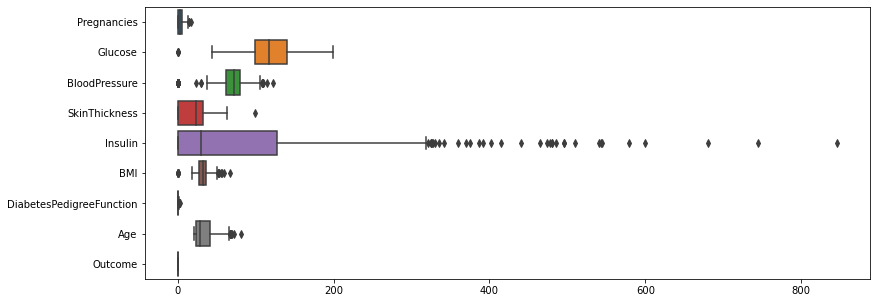

In [240]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df, orient = 'h')
plt.show()

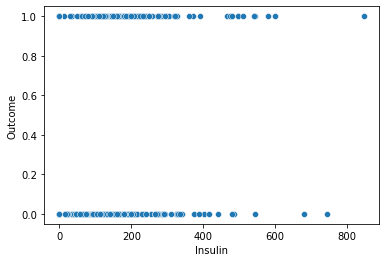

In [241]:
sns.scatterplot(x=df['Insulin'], y=df['Outcome'])
plt.show()

In [264]:
#replacing 0 with respected mean values
#using X to store all values except Outcome so Outcome dosnt effect while filling mean values in place of 0s
X=df.drop('Outcome',axis=1)
X=X.drop('DiabetesPedigreeFunction',axis=1)

In [265]:
#storing Outcome sequencial manner
Y=df['Outcome']

In [266]:
X.replace(to_replace=0,value=X.mean(),inplace=True)

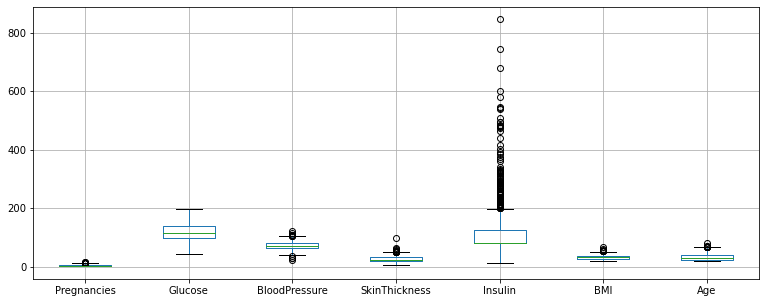

In [267]:
#removed the lower level of outliers
X.boxplot(figsize=(13,5))
plt.show()

In [268]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,33


In [269]:
#splitting the data for trainging and testing purpose
from sklearn.model_selection import train_test_split

In [270]:
#splitting randomly as 75:25
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [271]:
Y_train.value_counts()

0    449
1    242
Name: Outcome, dtype: int64

In [272]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [273]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [290]:
X_train_std

array([[-1.1411399 , -0.48666561, -0.35190336, ..., -0.42173132,
        -0.85187351, -0.78530638],
       [ 1.88732288, -0.91833474, -0.02008096, ..., -0.42173132,
        -1.3488873 ,  1.91442848],
       [-0.13165231, -1.051156  , -0.26019853, ..., -0.42173132,
        -0.63260272, -0.19473938],
       ...,
       [-0.13165231,  0.11103009, -0.18599216, ...,  0.0213798 ,
        -0.50104025,  0.98639462],
       [-0.46814817, -0.18781776,  0.14583024, ..., -0.15712248,
        -0.88110962, -0.78530638],
       [-0.13165231, -0.38704966, -0.51781455, ..., -0.42173132,
        -0.06249867, -0.36347281]])

In [275]:
#Train our model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [276]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [277]:
Y_pred = lr.predict(X_test_std)

In [278]:
#Checking the accuracy
from sklearn.metrics import accuracy_score

In [279]:
accuracy_score(Y_test,Y_pred)*100

79.22077922077922

In [280]:
#saving model into file
import pickle

In [297]:
with open('model_pickle.pkl','wb') as f:
    pickle.dump(lr,f)

In [298]:
with open('model_pickle.pkl','rb') as f:
    mp = pickle.load(f)

In [299]:
mp.predict([[6,148,72,35,79,33.6,50]])

array([1], dtype=int64)